<a href="https://colab.research.google.com/github/Manish-Paul/AI_Market_Trends_Manish_Kumar_Paul/blob/main/Stock_market_prediction_LSTM_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q yfinance

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr


# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

/tmp/ipython-input-1138366922.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1138366922.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1138366922.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1138366922.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,GOOG,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2025-08-26,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,228.710007,229.000000,226.020004,227.110001,26105400.0
2025-08-27,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,229.119995,229.869995,227.809998,228.570007,21254500.0
2025-08-28,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,231.600006,232.710007,228.020004,229.009995,33679600.0
2025-08-29,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,229.000000,231.809998,228.160004,231.320007,26199200.0
2025-09-02,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,225.339996,226.169998,221.830002,223.520004,38843900.0
2025-09-03,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,225.990005,227.169998,224.360001,225.210007,29223100.0
2025-09-04,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,235.679993,235.770004,230.779999,231.190002,59391800.0
2025-09-05,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,232.330002,236.000000,231.929993,235.190002,36721800.0


In [4]:
# Summary Stats
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,222.051707,224.268950,219.503363,221.730709,5.397330e+07
std,16.194561,15.686077,16.414228,16.166987,2.773858e+07
min,171.998993,189.875235,168.796839,171.530131,2.323470e+07
25%,209.774426,211.763700,207.578693,209.734468,3.951048e+07
50%,224.674362,226.172109,222.250645,223.916518,4.686590e+07
75%,232.776672,235.064416,230.351675,232.780872,5.681858e+07
max,258.103729,259.179926,256.718662,257.276679,3.186799e+08


In [5]:
GOOG.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,178.237515,180.225999,176.083839,178.059731,2.230955e+07
std,17.227324,17.081601,17.015896,16.869090,1.042833e+07
min,146.273285,150.743903,142.361486,143.089954,6.809800e+06
25%,165.650154,167.164189,163.671972,165.321944,1.532790e+07
50%,174.489548,176.632284,172.604374,174.529976,1.986705e+07
75%,192.035595,193.661563,189.229671,192.099143,2.538388e+07
max,239.940002,240.589996,233.729996,235.789993,7.872980e+07


In [6]:
AMZN.describe()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,209.183200,211.410520,206.559640,209.014680,4.187767e+07
std,17.956197,17.668396,18.265504,18.063033,1.859115e+07
min,167.320007,169.600006,161.380005,162.000000,1.500750e+07
25%,192.722500,194.469997,189.687496,192.615002,3.024588e+07
50%,210.480003,213.459999,208.320000,210.510002,3.729880e+07
75%,224.995003,226.622501,222.322495,225.055004,4.412072e+07
max,242.059998,242.520004,238.029999,239.020004,1.231594e+08


In [7]:
MSFT.describe()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,438.612356,442.268871,434.637759,438.440286,2.163300e+07
std,44.029823,43.955871,44.727025,44.666536,8.378003e+06
min,353.329437,363.215009,343.593365,349.662226,7.164500e+06
25%,410.718170,413.235124,406.661781,410.181127,1.658012e+07
50%,427.237488,430.113753,423.332780,427.570191,1.954060e+07
75%,471.420029,472.630532,467.970690,469.301000,2.356322e+07
max,534.760925,554.538376,531.027040,554.318706,6.426370e+07


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-09-10 to 2025-09-09
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     250 non-null    float64
 1   (High, AAPL)      250 non-null    float64
 2   (Low, AAPL)       250 non-null    float64
 3   (Open, AAPL)      250 non-null    float64
 4   (Volume, AAPL)    250 non-null    int64  
 5   (company_name, )  250 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


In [9]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-09-10 to 2025-09-09
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, GOOG)     250 non-null    float64
 1   (High, GOOG)      250 non-null    float64
 2   (Low, GOOG)       250 non-null    float64
 3   (Open, GOOG)      250 non-null    float64
 4   (Volume, GOOG)    250 non-null    int64  
 5   (company_name, )  250 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


In [10]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-09-10 to 2025-09-09
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AMZN)     250 non-null    float64
 1   (High, AMZN)      250 non-null    float64
 2   (Low, AMZN)       250 non-null    float64
 3   (Open, AMZN)      250 non-null    float64
 4   (Volume, AMZN)    250 non-null    int64  
 5   (company_name, )  250 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


In [11]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-09-10 to 2025-09-09
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, MSFT)     250 non-null    float64
 1   (High, MSFT)      250 non-null    float64
 2   (Low, MSFT)       250 non-null    float64
 3   (Open, MSFT)      250 non-null    float64
 4   (Volume, MSFT)    250 non-null    int64  
 5   (company_name, )  250 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


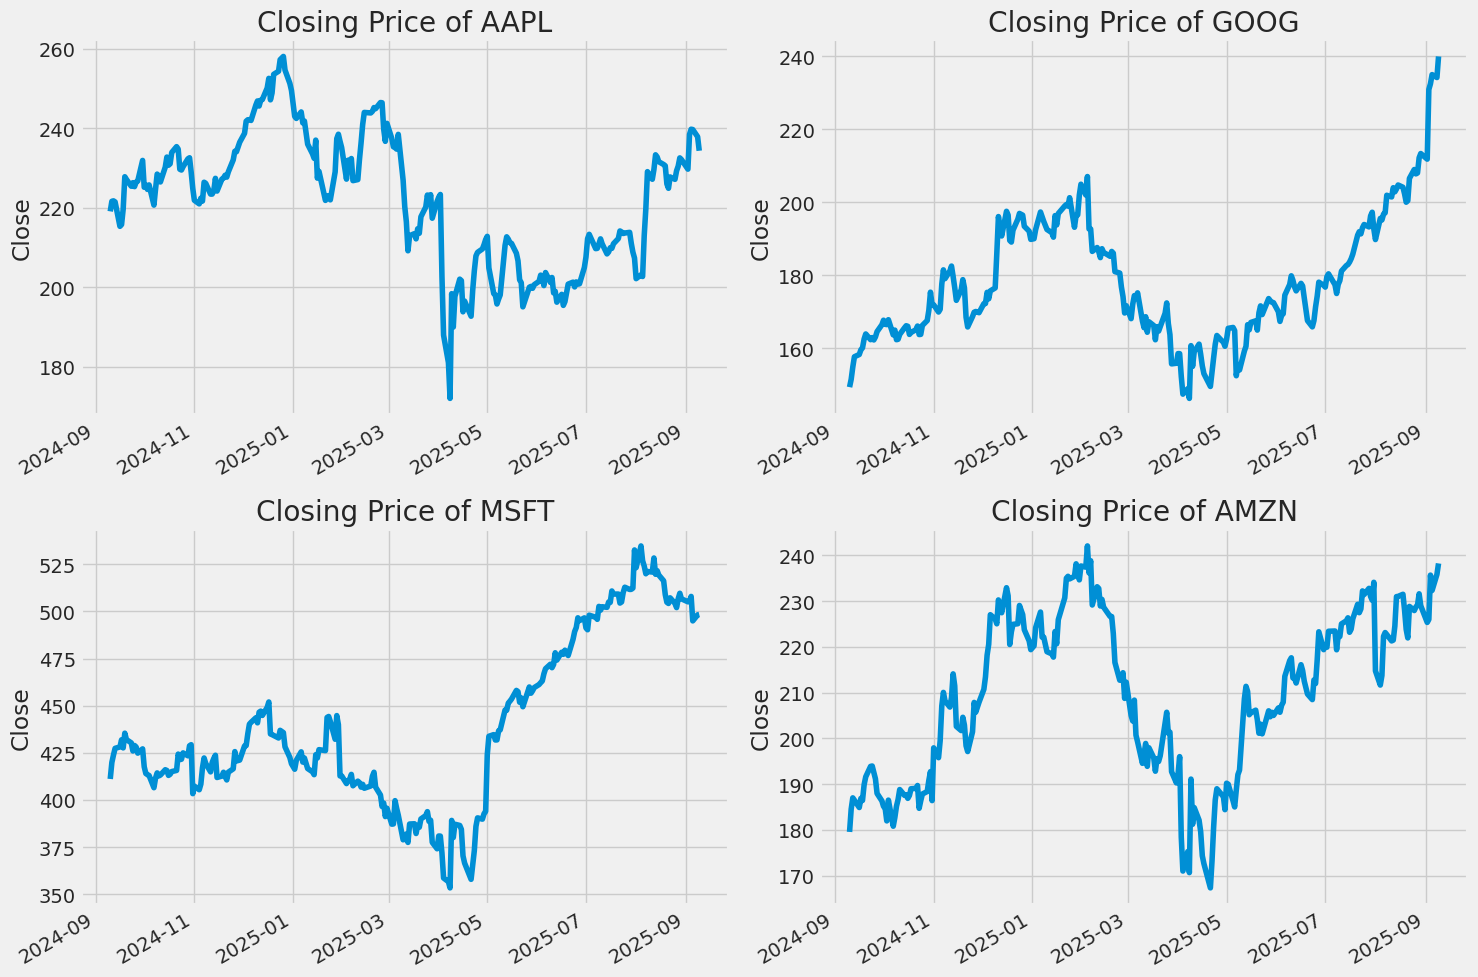

In [12]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company[('Close', tech_list[i - 1])].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

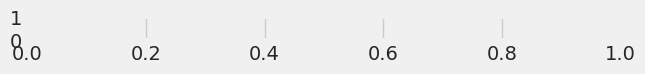

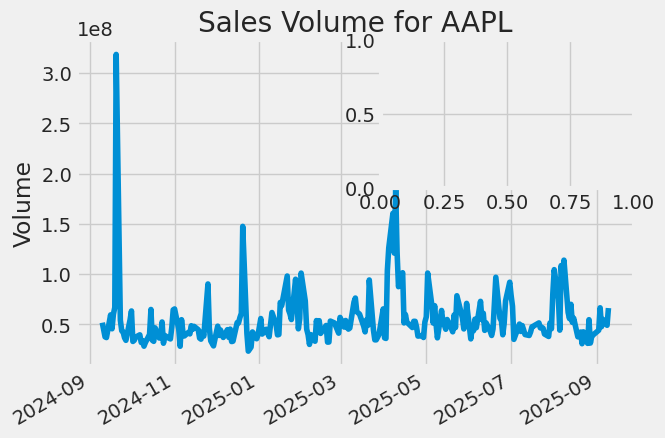

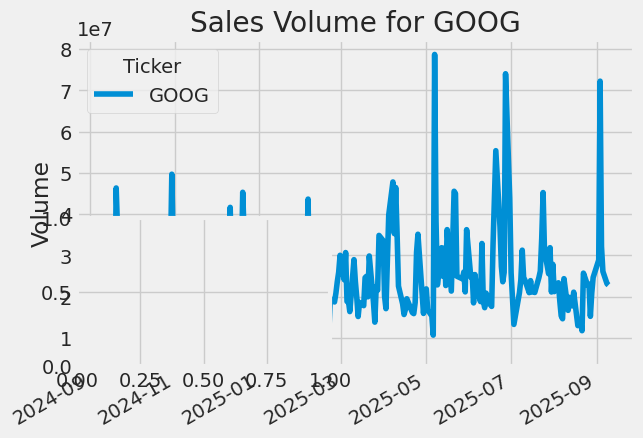

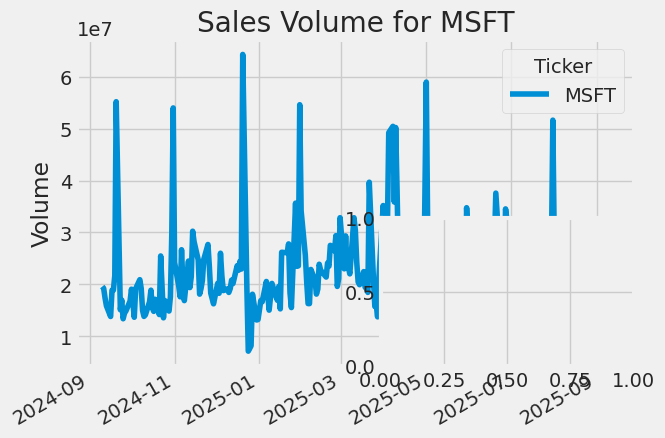

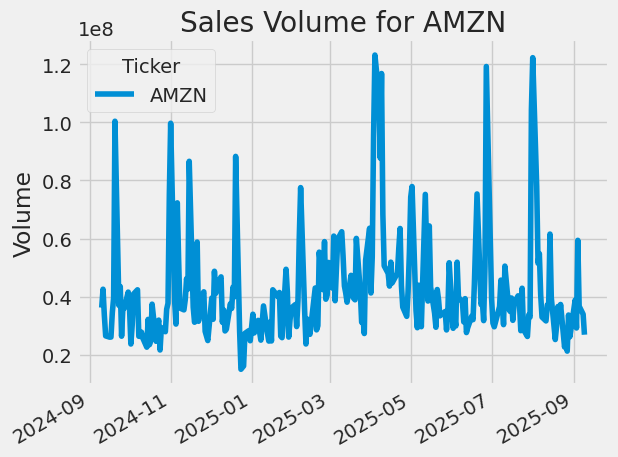

In [13]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

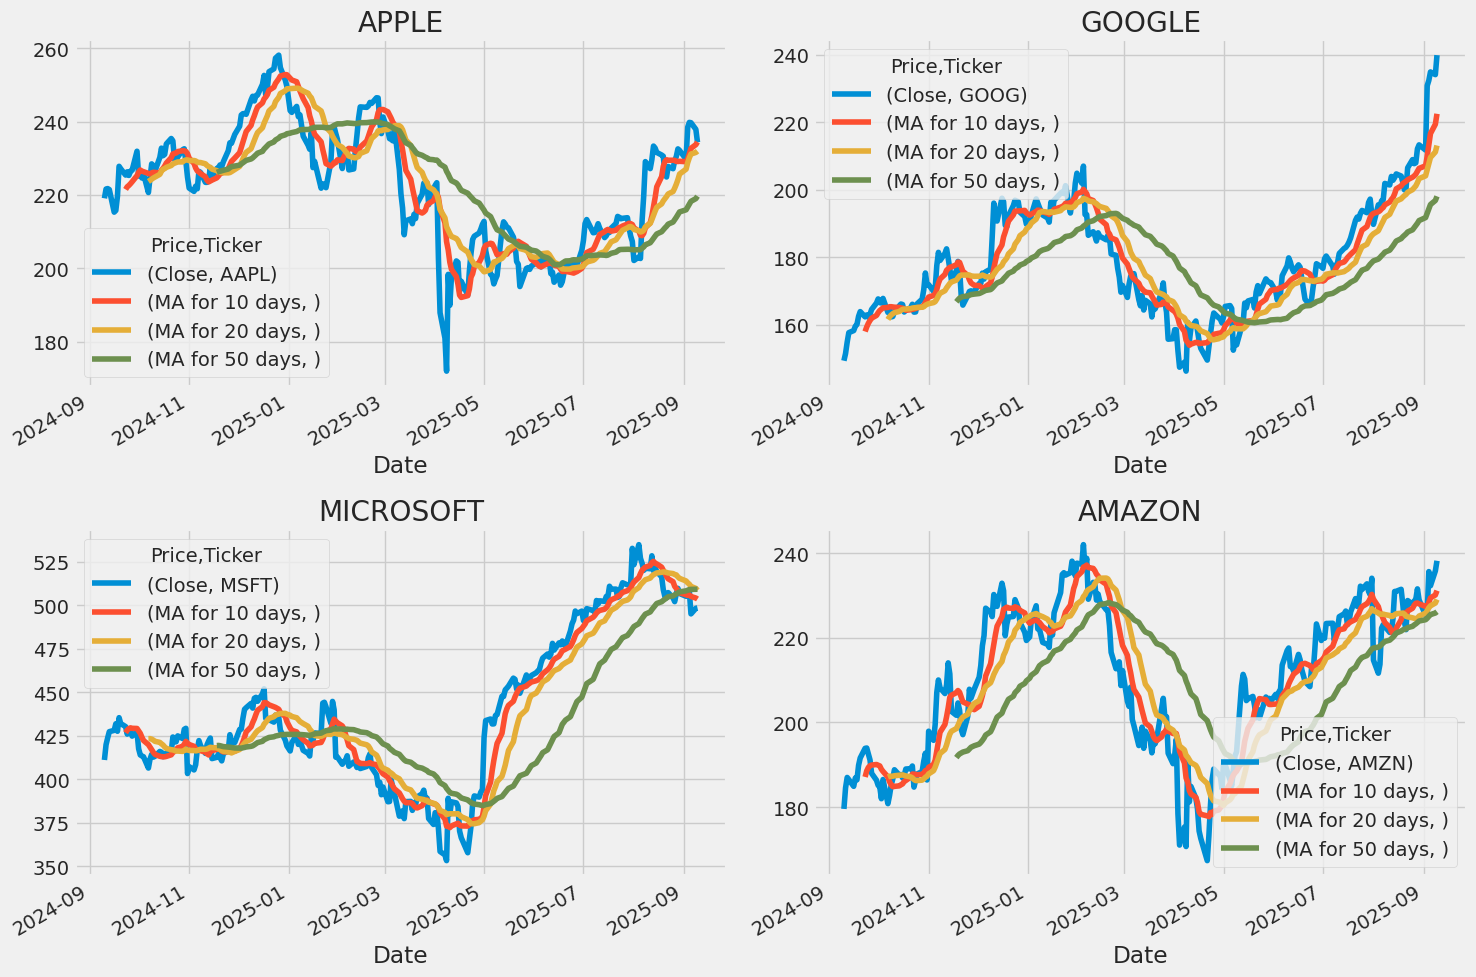

In [14]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

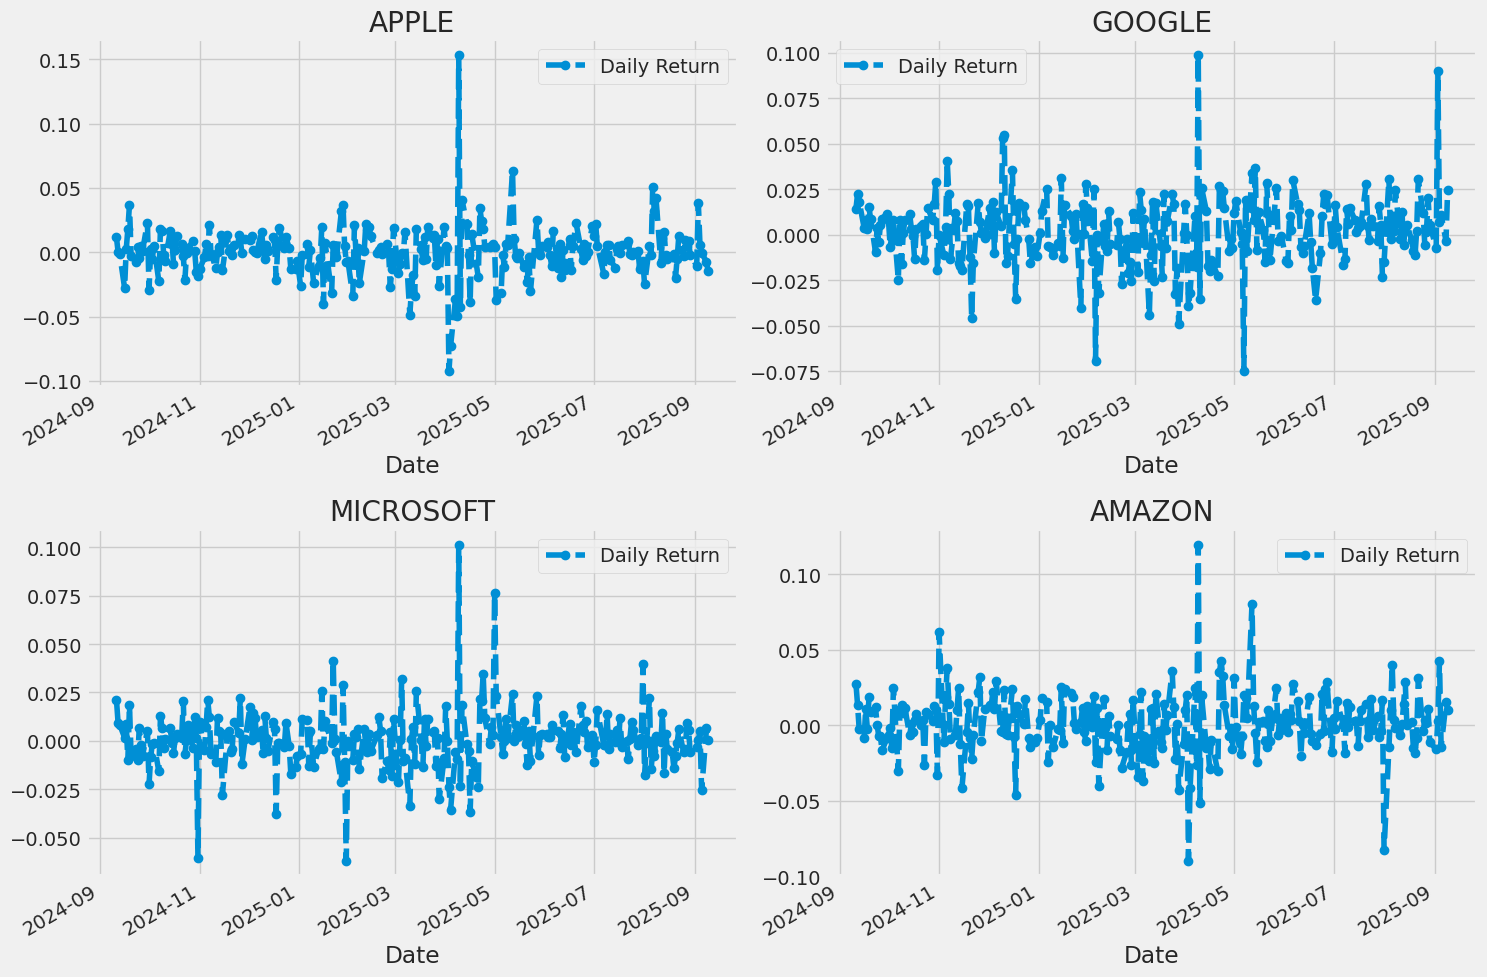

In [15]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

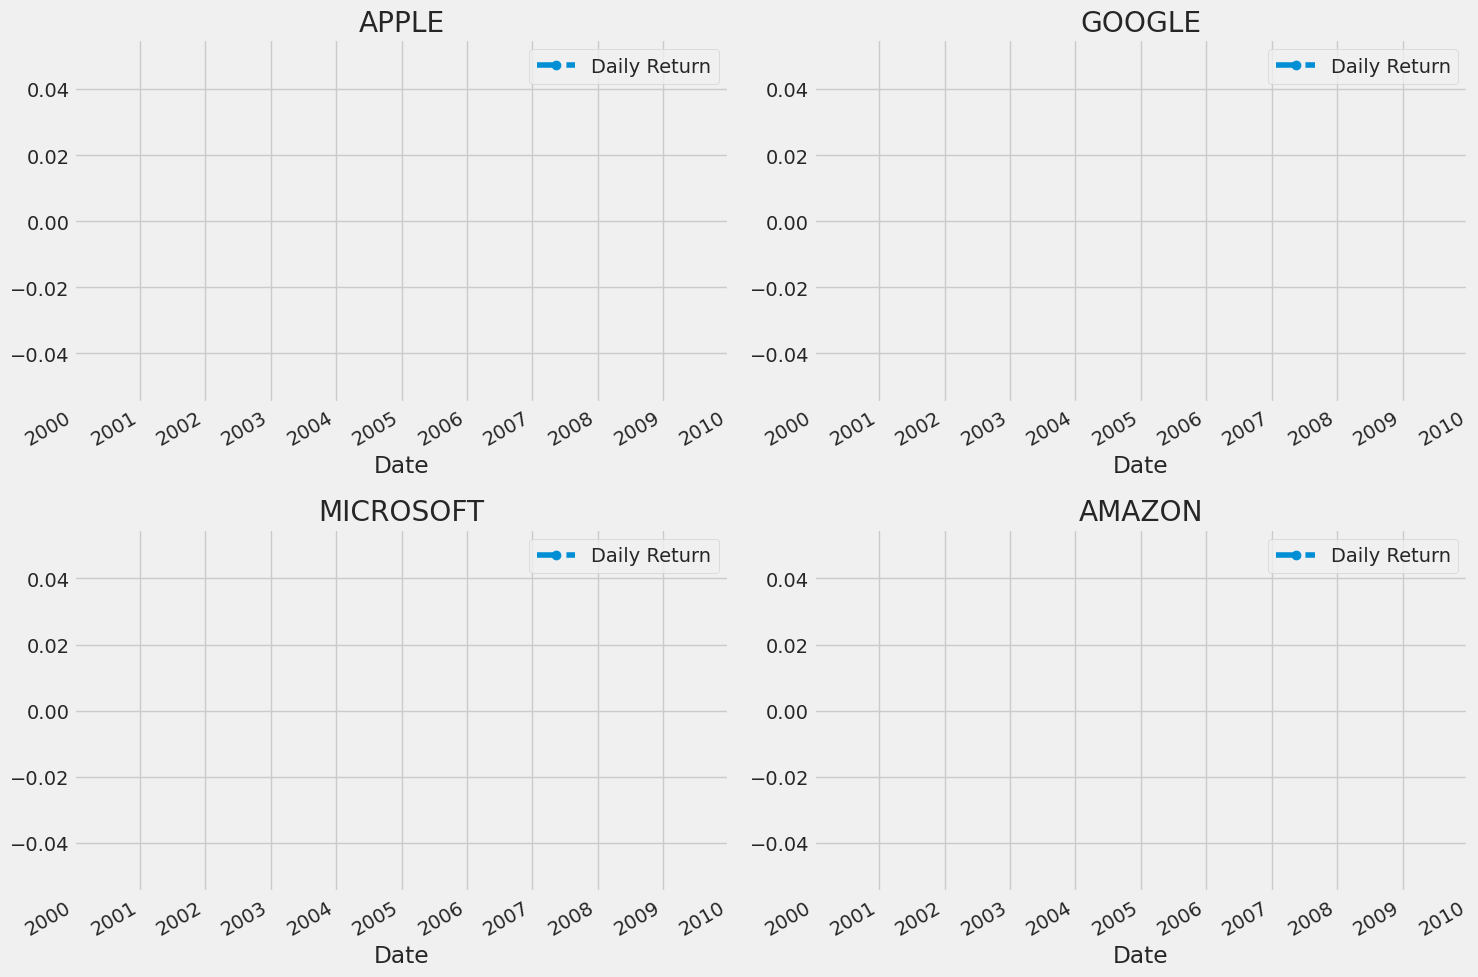

In [16]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

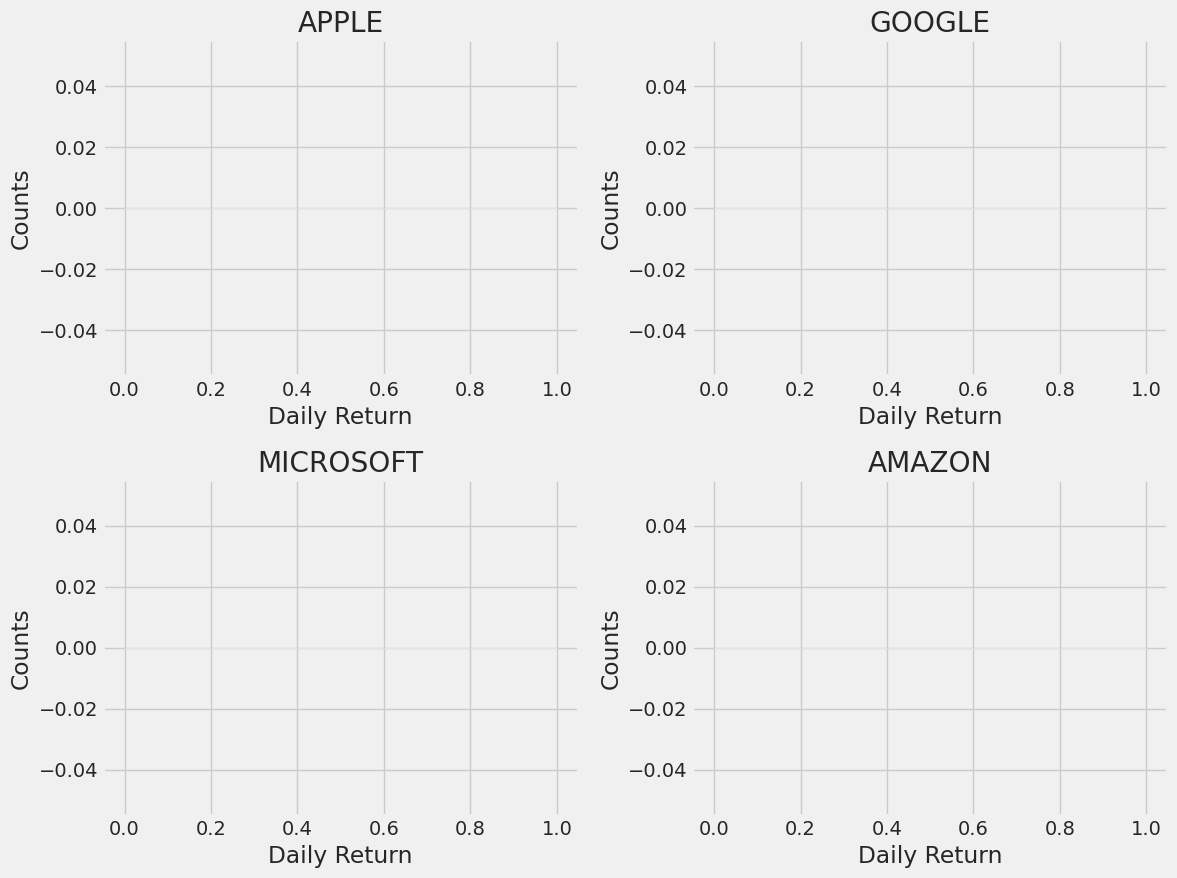

In [17]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [18]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = yf.download(tech_list, start=start, end=end)['Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

/tmp/ipython-input-3407210578.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  closing_df = yf.download(tech_list, start=start, end=end)['Close']
[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-09-10,NaN,NaN,NaN,NaN
2024-09-11,0.011585,0.027680,0.014266,0.021342
2024-09-12,0.000494,0.013440,0.022281,0.009361
2024-09-13,-0.001212,-0.002727,0.018195,0.008408
2024-09-16,-0.027775,-0.008580,0.003915,0.001742


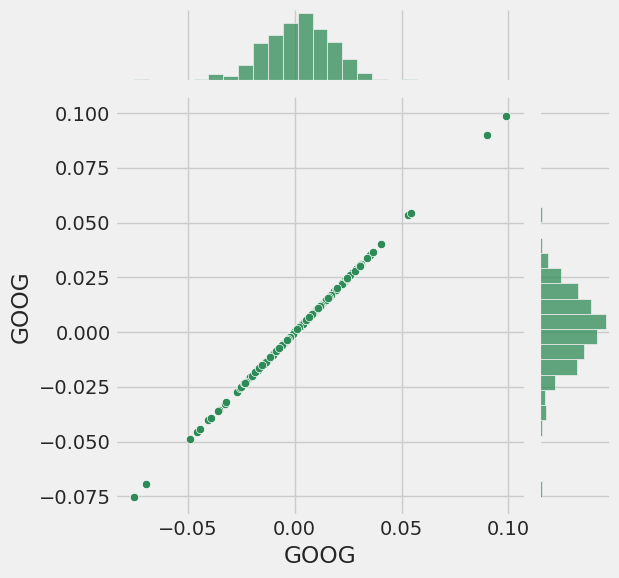

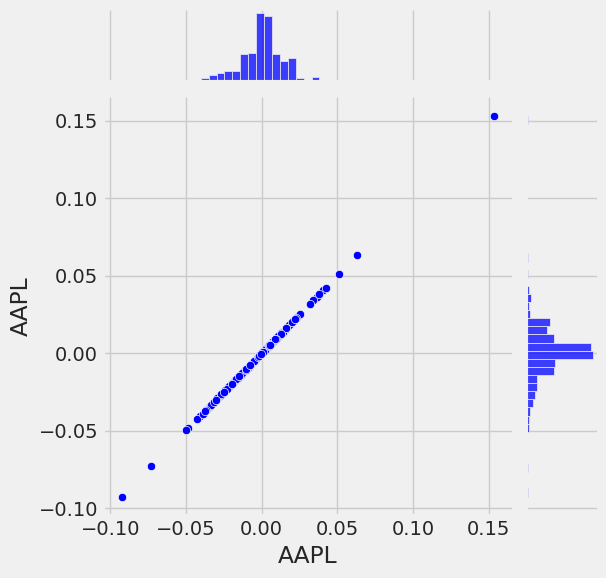

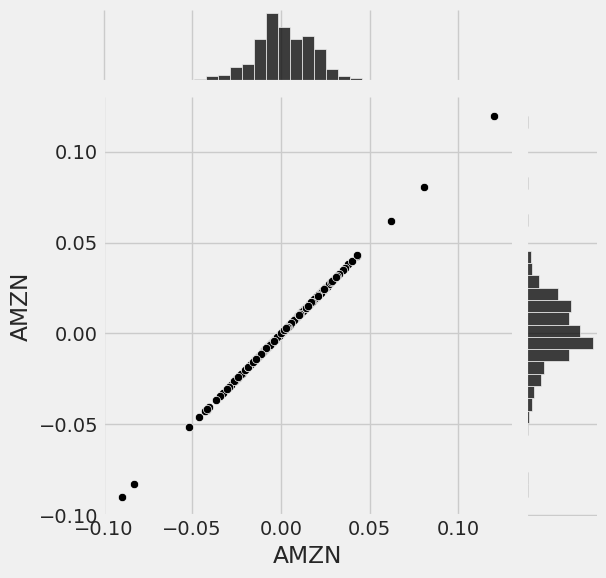

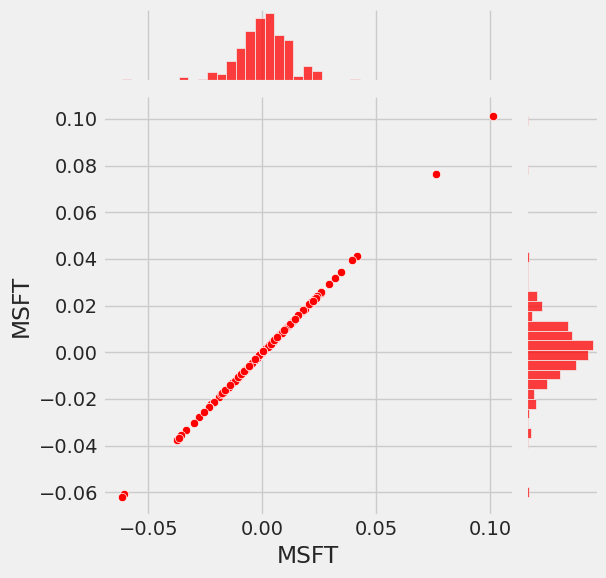

In [19]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')
sns.jointplot(x='AAPL', y='AAPL', data=tech_rets, kind='scatter', color='blue')
sns.jointplot(x='AMZN', y='AMZN', data=tech_rets, kind='scatter', color='black')
sns.jointplot(x='MSFT', y='MSFT', data=tech_rets, kind='scatter', color='red')

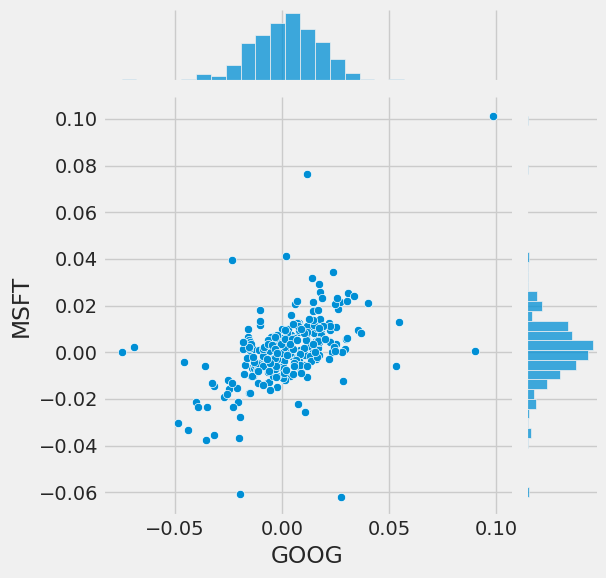

In [20]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

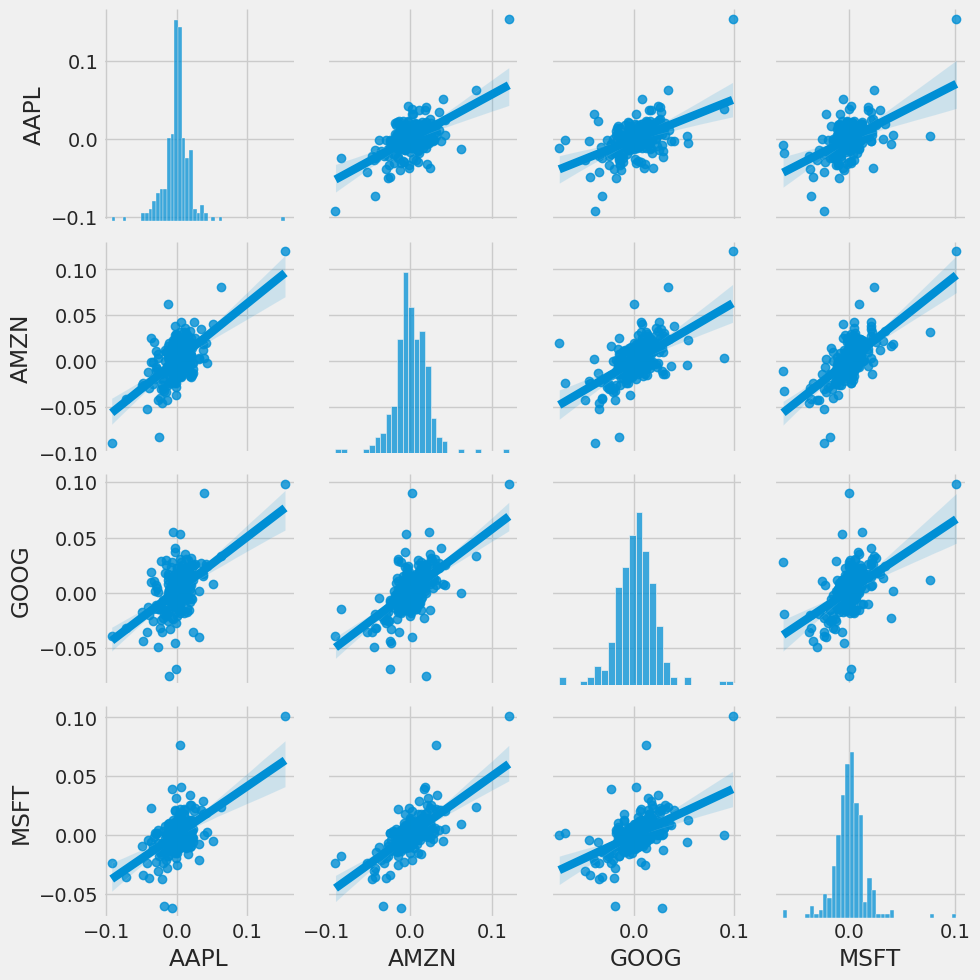

In [21]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

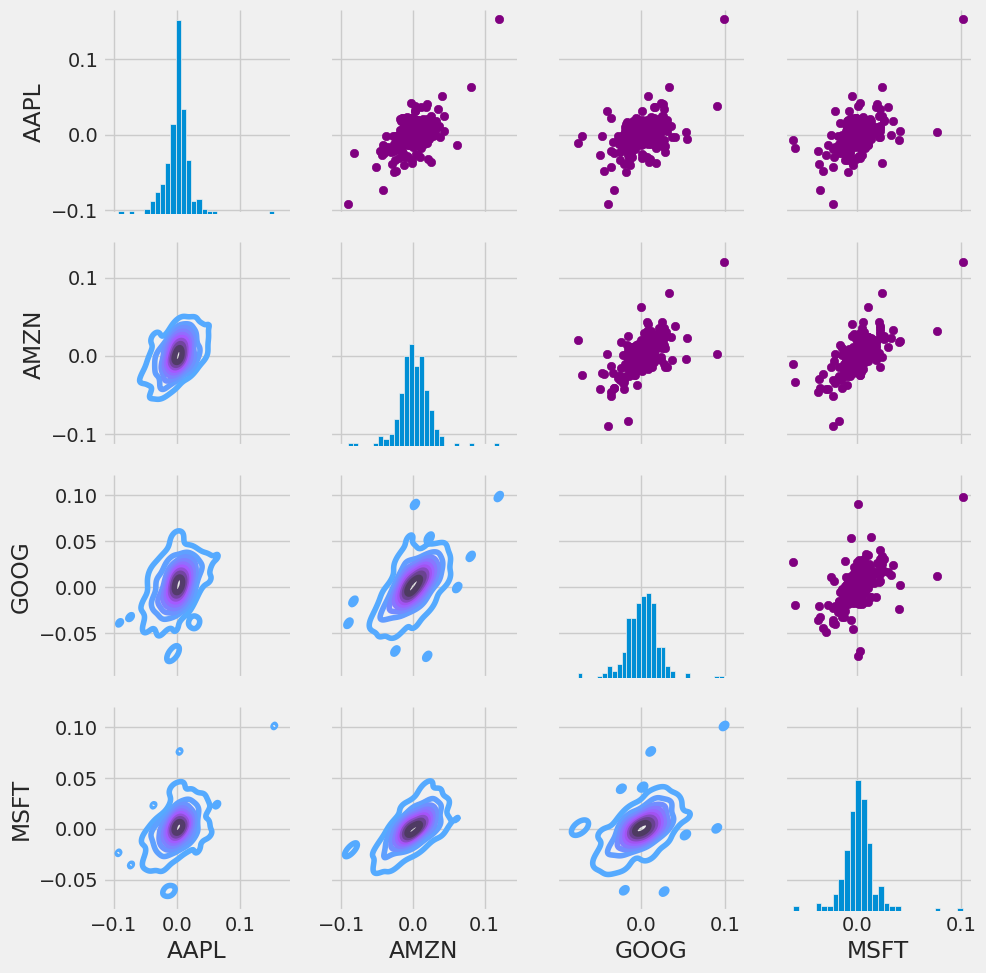

In [22]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

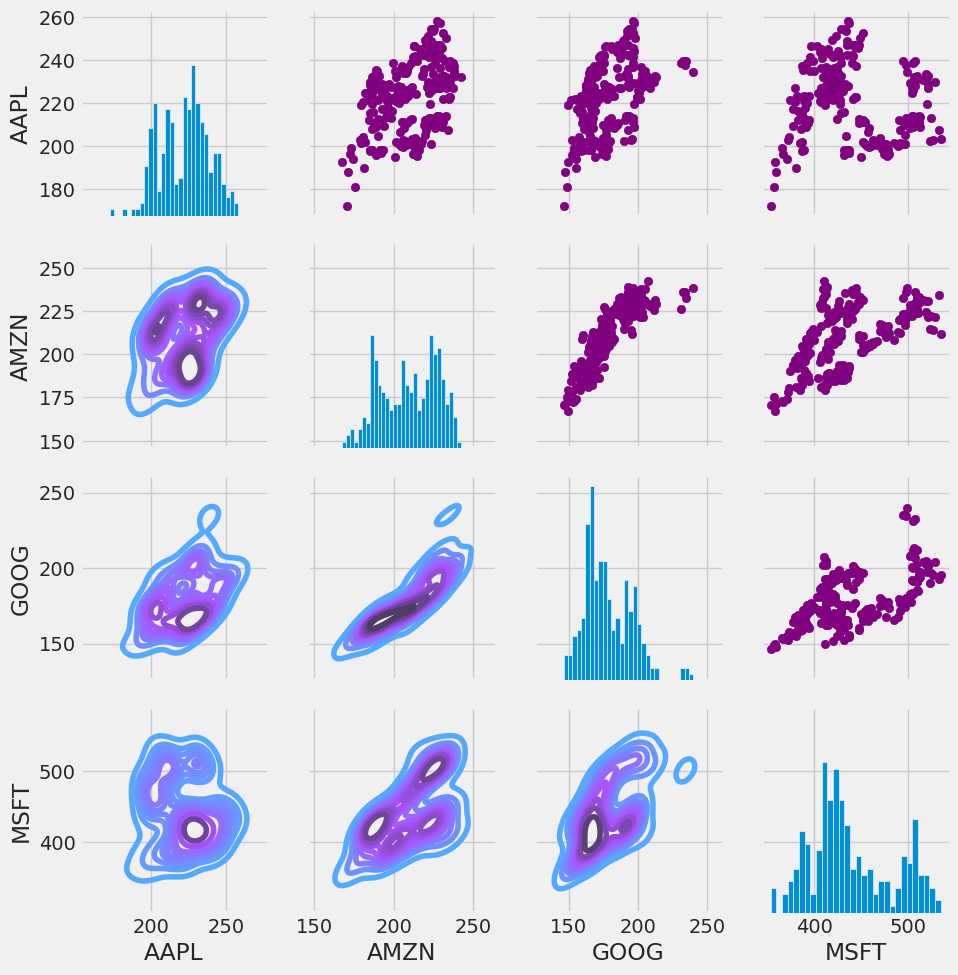

In [23]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

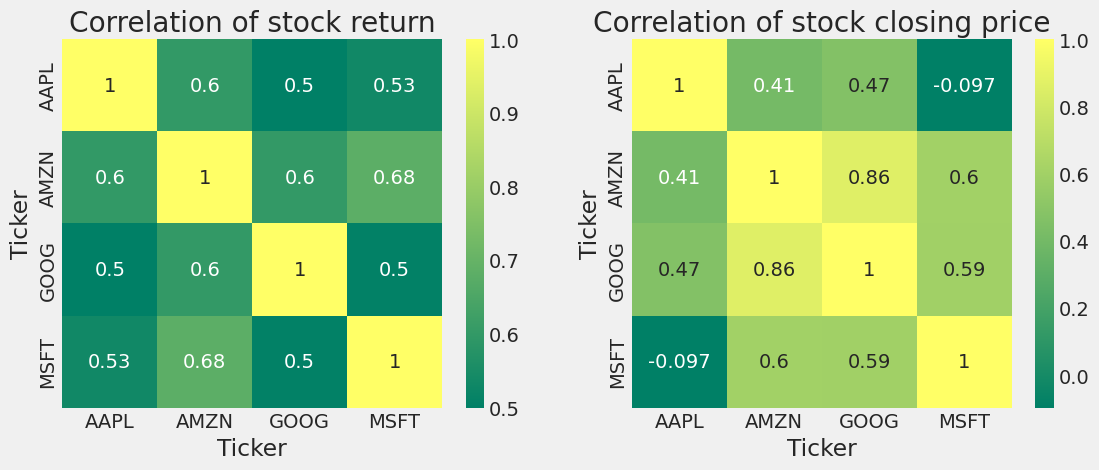

In [24]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

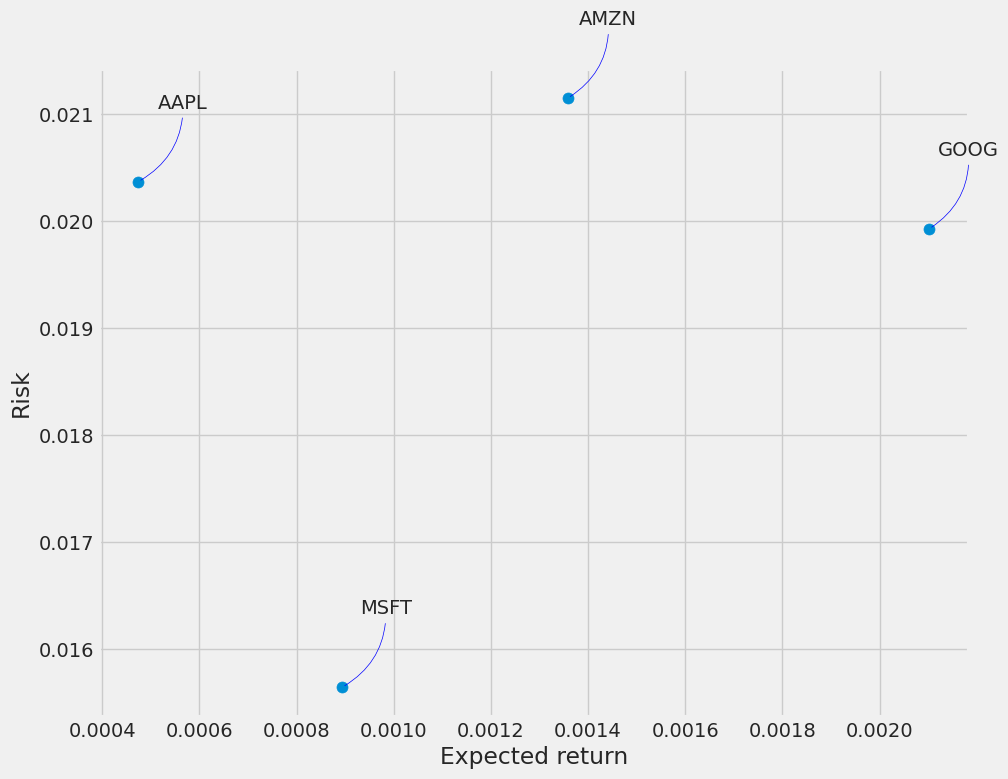

In [25]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [26]:
# Get the stock quote
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
# Show the data
df

/tmp/ipython-input-2073041856.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.345172,12.383298,12.278228,12.290236,302220800
2012-01-04,12.411518,12.448744,12.286635,12.308249,260022000
2012-01-05,12.549310,12.564920,12.388401,12.456848,271269600
2012-01-06,12.680497,12.691004,12.585033,12.601544,318292800
2012-01-09,12.660383,12.841104,12.648975,12.773560,394024400
...,...,...,...,...,...
2025-09-03,238.470001,238.850006,234.360001,237.210007,66427800
2025-09-04,239.779999,239.899994,236.740005,238.449997,47549400


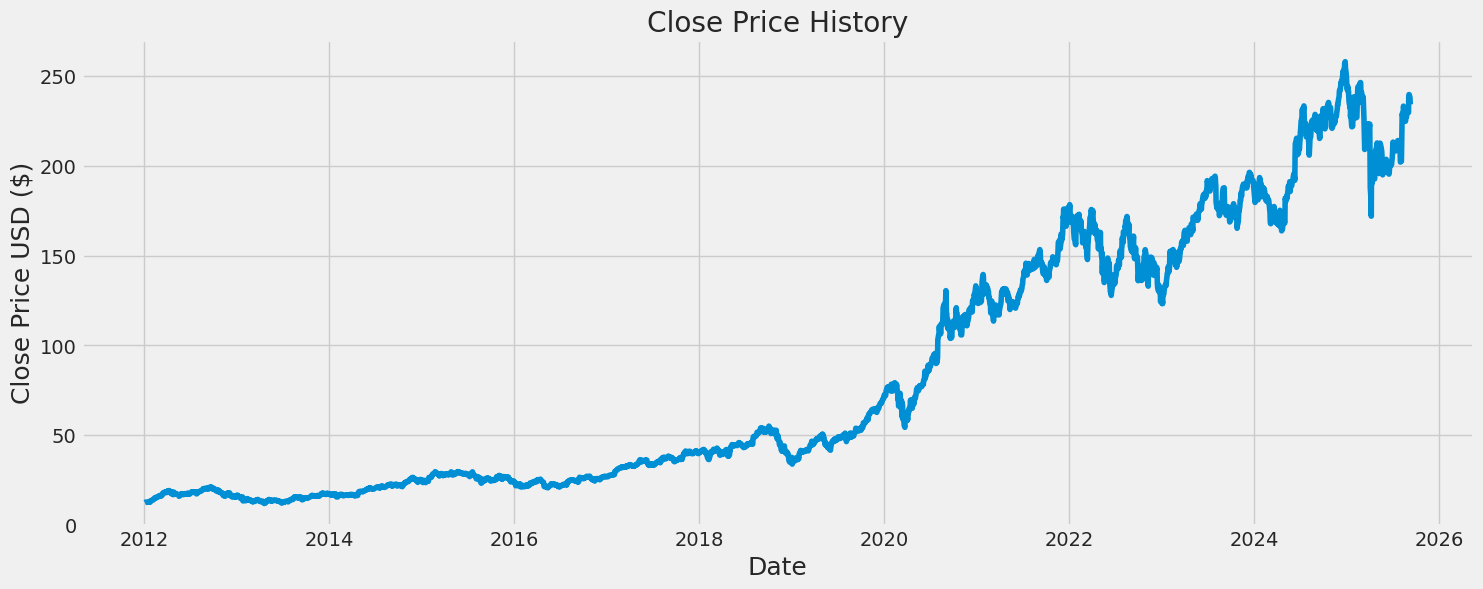

In [27]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [28]:
# Create a new dataframe with only the 'Close column
data = df['Close']
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3269

In [29]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00182111],
       [0.00209058],
       [0.00265024],
       ...,
       [0.92521036],
       [0.91785883],
       [0.9035213 ]])

In [30]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00182111, 0.00209058, 0.00265024, 0.00318308, 0.00310138,
       0.0032855 , 0.00320137, 0.00305992, 0.00286728, 0.00346351,
       0.00400124, 0.00383541, 0.00292701, 0.00379394, 0.00294043,
       0.00614111, 0.00589359, 0.0062167 , 0.00691536, 0.00733846,
       0.00730309, 0.00717264, 0.00772862, 0.0082517 , 0.00884429,
       0.00980147, 0.01181209, 0.01184256, 0.01296192, 0.01379833,
       0.01236078, 0.01291437, 0.01290337, 0.01445556, 0.01423485,
       0.01464334, 0.01537738, 0.01578583, 0.01696246, 0.01781962,
       0.01806712, 0.01815371, 0.0166881 , 0.01633451, 0.01638692,
       0.01776474, 0.01815246, 0.01898523, 0.02094835, 0.0235674 ,
       0.02307723, 0.02307843, 0.02497205, 0.02556466, 0.02514275,
       0.02475744, 0.0243563 , 0.025689  , 0.0266035 , 0.02698629])]
[np.float64(0.026040157971589484)]

[array([0.00182111, 0.00209058, 0.00265024, 0.00318308, 0.00310138,
       0.0032855 , 0.00320137, 0.00305992, 0.00286728, 0.00346351,
       0.00400124, 0.0

In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3209/3209 ━━━━━━━━━━━━━━━━━━━━ 152s 46ms/step - loss: 0.0024


In [32]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


np.float64(7.257581115558026)

/tmp/ipython-input-773832719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


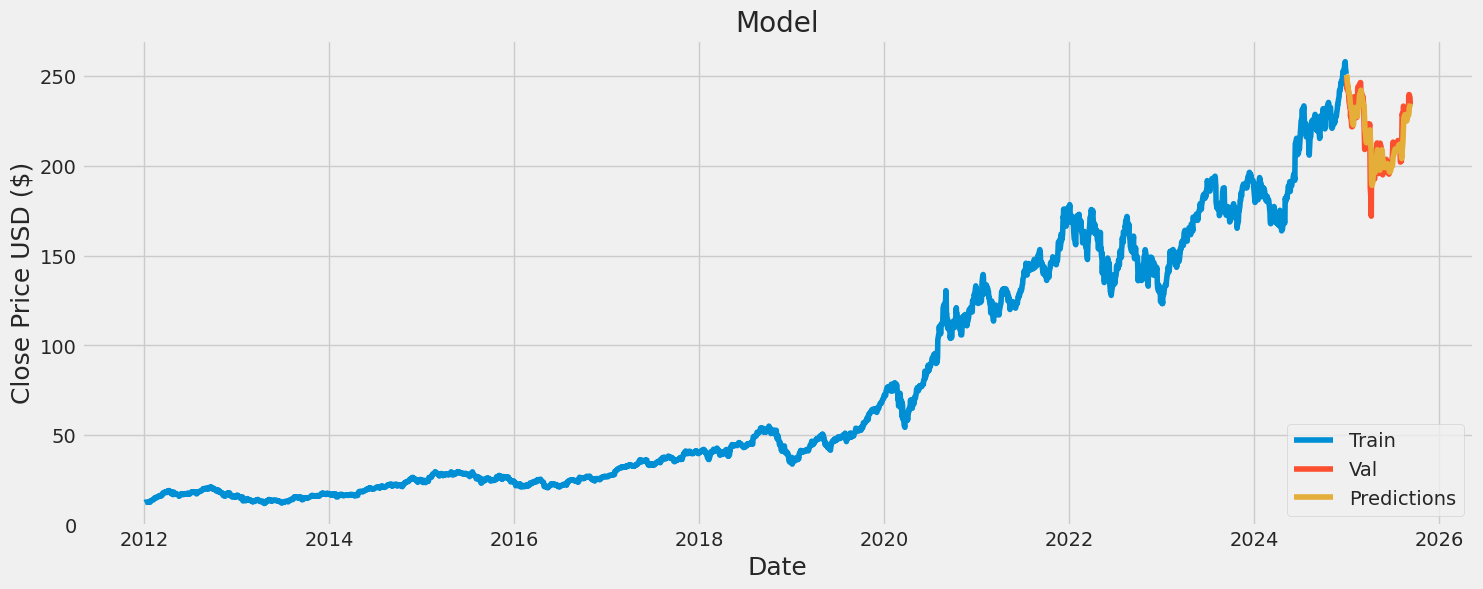

In [33]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train) # Plot train Series directly
plt.plot(valid[['AAPL', 'Predictions']]) # Plot columns from valid DataFrame
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [34]:
valid

Ticker,AAPL,Predictions
Date,,
2024-12-31,249.534180,250.873138
2025-01-02,242.987427,249.671326
2025-01-03,242.499161,247.197266
2025-01-06,244.133347,244.735855
2025-01-07,241.353210,243.112762
...,...,...
2025-09-03,238.470001,228.446426
2025-09-04,239.779999,230.103470
2025-09-05,239.690002,232.125107
